<a href="https://colab.research.google.com/github/Kai-Infernus/SAT_Image_Classification_Lenet5/blob/main/Eurosat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MCSE503L

M.Tech CSE

CAO Assignment 1

---

Aditya Hiremath 24MAI0117

Paritosh Dwivedi - 24MAI0013

C. DEEPTHI CHOWDARY - 24MAI0036


In [ ]:
! pip install -q kaggle

Please follow the steps below to download and use kaggle data within Google Colab:

1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

# Choose the kaggle.json file that you downloaded

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kaiinfernus","key":"f5cac7a1655fa3abbe321cf6555dd71b"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                              title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset      Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          20815        433  1.0              
bhadramohit/social-media-usage-datasetapplications               Social Media Usage Dataset(Applications)         9KB  2024-10-23 05:33:28           1481         23  1.0              
valakhorasani/gym-members-exercise-dataset                       Gym Members Exercise Dataset                    22KB  2024-10-06 11:27:38          11812        177  1.0              
muhammadroshaanriaz/students-performance-dataset-cleaned         Students Perfor

In [ ]:
!kaggle datasets download -d apollo2506/eurosat-dataset

Dataset URL: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset
License(s): CC0-1.0
100% 2.03G/2.04G [00:21<00:00, 151MB/s]
100% 2.04G/2.04G [00:21<00:00, 104MB/s]


In [ ]:
! unzip "/content/eurosat-dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: EuroSATallBands/River/River_1990.tif  
  inflating: EuroSATallBands/River/River_1991.tif  
  inflating: EuroSATallBands/River/River_1992.tif  
  inflating: EuroSATallBands/River/River_1993.tif  
  inflating: EuroSATallBands/River/River_1994.tif  
  inflating: EuroSATallBands/River/River_1995.tif  
  inflating: EuroSATallBands/River/River_1996.tif  
  inflating: EuroSATallBands/River/River_1997.tif  
  inflating: EuroSATallBands/River/River_1998.tif  
  inflating: EuroSATallBands/River/River_1999.tif  
  inflating: EuroSATallBands/River/River_2.tif  
  inflating: EuroSATallBands/River/River_20.tif  
  inflating: EuroSATallBands/River/River_200.tif  
  inflating: EuroSATallBands/River/River_2000.tif  
  inflating: EuroSATallBands/River/River_2001.tif  
  inflating: EuroSATallBands/River/River_2002.tif  
  inflating: EuroSATallBands/River/River_2003.tif  
  inflating: EuroSATallBands/River/River_2004.tif  
  inflating: EuroSA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models, layers

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 64
CHANNELS = 3
EPOCHS = 100

In [ ]:
ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/EuroSAT",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 27000 files belonging to 10 classes.


In [ ]:
!nvidia-smi

Fri Nov  8 09:53:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0              29W /  70W |    119MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from numba import cuda


cc_cores_per_SM_dict = {
    (2,0) : 32,
    (2,1) : 48,
    (3,0) : 192,
    (3,5) : 192,
    (3,7) : 192,
    (5,0) : 128,
    (5,2) : 128,
    (6,0) : 64,
    (6,1) : 128,
    (7,0) : 64,
    (7,5) : 64,
    (8,0) : 64,
    (8,6) : 128,
    (8,9) : 128,
    (9,0) : 128
    }
# the above dictionary should result in a value of "None" if a cc match
# is not found.  The dictionary needs to be extended as new devices become
# available, and currently does not account for all Jetson devices
device = cuda.get_current_device()
my_sms = getattr(device, 'MULTIPROCESSOR_COUNT')
my_cc = device.compute_capability
cores_per_sm = cc_cores_per_SM_dict.get(my_cc)
total_cores = cores_per_sm*my_sms
print("GPU compute capability: " , my_cc)
print("GPU total number of SMs: " , my_sms)
print("total cores: " , total_cores)

GPU compute capability:  (7, 5)
GPU total number of SMs:  40
total cores:  2560


In [ ]:
class_names = ds.class_names
class_names

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

(32, 64, 64, 3)


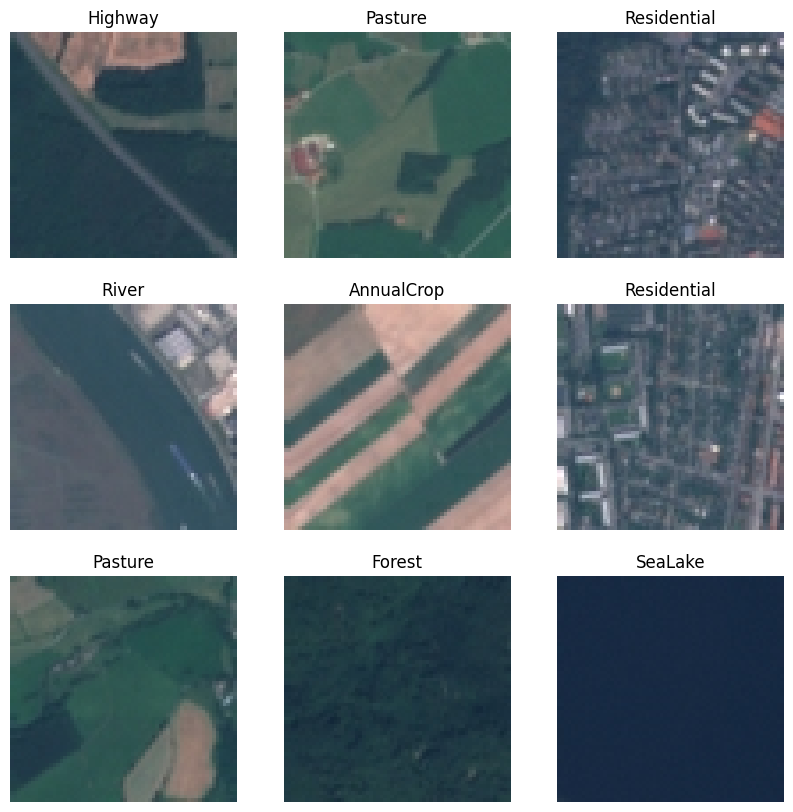

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in ds.take(1):
    print(image_batch.shape)
    for i in range(0,9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
len(ds)

844

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(ds)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

# Apply normalization
train_ds = train_ds.map(normalize_img)
val_ds = val_ds.map(normalize_img)
test_ds = test_ds.map(normalize_img)


In [ ]:
class_counts = [0] * len(class_names)
for _, label_batch in train_ds:
    for label in label_batch:
        class_counts[label] += 1
print(dict(zip(class_names, class_counts)))


{'AnnualCrop': 2406, 'Forest': 2432, 'HerbaceousVegetation': 2388, 'Highway': 2018, 'Industrial': 2008, 'Pasture': 1601, 'PermanentCrop': 1978, 'Residential': 2424, 'River': 1983, 'SeaLake': 2354}


In [ ]:
type(train_ds)

tensorflow.python.data.ops.map_op._MapDataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define LeNet-5 for 64x64 RGB images
def lenet5():
    model = models.Sequential()

    # C1 - Convolution Layer (6 filters, 5x5 kernel, 'tanh' activation)
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(64, 64, 3), padding='same'))

    # S2 - Average Pooling Layer (2x2 pooling window)
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))

    # C3 - Convolution Layer (16 filters, 5x5 kernel, 'tanh' activation)
    model.add(layers.Conv2D(16, (5, 5), activation='tanh', padding='valid'))

    # S4 - Average Pooling Layer (2x2 pooling window)
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))

    # C5 - Fully Connected Convolution Layer (120 filters, 5x5 kernel, 'tanh' activation)
    model.add(layers.Conv2D(120, (5, 5), activation='tanh', padding='valid'))

    # Flatten the output
    model.add(layers.Flatten())

    # F6 - Fully Connected Layer (84 units, 'tanh' activation)
    model.add(layers.Dense(84, activation='tanh'))

    # Output Layer (for classification into classes)
    model.add(layers.Dense(len(class_names), activation='softmax'))

    return model


In [ ]:
from tensorflow.keras.optimizers import Adam
# Create and compile the model
model = lenet5()

model.compile(optimizer=Adam(learning_rate=0.001),  # Try decreasing to 0.001 or increasing
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS  # You can adjust the number of epochs
)


Epoch 1/100
675/675 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.3287 - loss: 1.8106 - val_accuracy: 0.5342 - val_loss: 1.3244
Epoch 2/100
675/675 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.5326 - loss: 1.3088 - val_accuracy: 0.5283 - val_loss: 1.3519
Epoch 3/100
675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5412 - loss: 1.2736 - val_accuracy: 0.5547 - val_loss: 1.2644
Epoch 4/100
675/675 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5605 - loss: 1.2334 - val_accuracy: 0.5904 - val_loss: 1.1719
Epoch 5/100
675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5777 - loss: 1.1910 - val_accuracy: 0.5454 - val_loss: 1.2697
Epoch 6/100
675/675 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5553 - loss: 1.2486 - val_accuracy: 0.5499 - val_loss: 1.2385
Epoch 7/100
675/675 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5386 - loss: 1.2745 - val_accuracy: 0.5510 - val_loss: 1.2683
Epoch 8/100
675/675 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5495 - loss: 1.2673 - val_a

In [ ]:
# Evaluate on the test dataset
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test accuracy: {test_acc}')


85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7285 - loss: 0.7672
Test accuracy: 0.7279411554336548


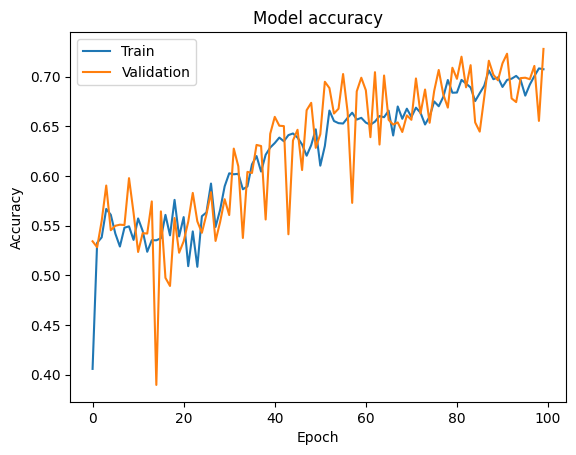

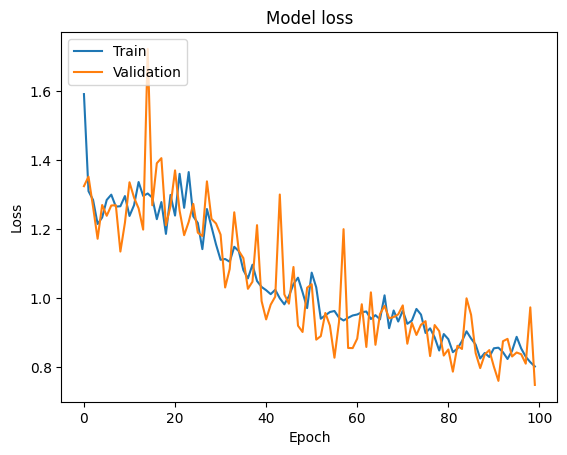

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal_and_vertical"),
#     layers.RandomRotation(0.2),
# ])

# # Apply the data augmentation to train_ds
# train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


In [ ]:
import torch

# Check if a GPU is available
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Device Name:", torch.cuda.get_device_name(0))
    print("Total Memory (GB):", round(torch.cuda.get_device_properties(0).total_memory / (1024 ** 3), 2))
    print("Compute Capability:", torch.cuda.get_device_properties(0).major, torch.cuda.get_device_properties(0).minor)
else:
    device = torch.device('cpu')
    print("Using CPU instead of GPU")


Device Name: Tesla T4
Total Memory (GB): 14.75
Compute Capability: 7 5


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Initialize model, criterion, optimizer
model = lenet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_gpus = torch.cuda.device_count()

if num_gpus > 1:
    model = nn.DataParallel(model)  # Use DataParallel wrapper
model.to(device)


AttributeError: 'Sequential' object has no attribute 'parameters'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the LeNet5 model as a class that inherits from nn.Module
class lenet5(nn.Module):
    def __init__(self):
        super(lenet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # Adjust input size if needed
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)  # Adjust input size if needed
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model, criterion, optimizer
model = lenet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_gpus = torch.cuda.device_count()

if num_gpus > 1:
    model = nn.DataParallel(model)  # Use DataParallel wrapper
model.to(device)

In [ ]:
def parallel_training_step(inputs, labels, model, criterion, optimizer, num_gpus):
    # Split inputs and labels manually across GPUs
    input_splits = torch.split(inputs, inputs.size(0) // num_gpus)
    label_splits = torch.split(labels, labels.size(0) // num_gpus)

    # Forward pass on each GPU
    outputs = []
    losses = []
    for i in range(num_gpus):
        input_device = input_splits[i].to(f'cuda:{i}')
        label_device = label_splits[i].to(f'cuda:{i}')

        # Perform forward pass and compute loss on each device
        with torch.cuda.device(i):
            output = model(input_device)
            loss = criterion(output, label_device)
            outputs.append(output)
            losses.append(loss)

    # Aggregate losses across GPUs
    total_loss = sum(losses) / num_gpus
    return total_loss, outputs
